In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

import pandas as pd
sns.set_theme(rc={"figure.dpi":100, 'savefig.dpi':300,})
plt.style.use('seaborn-whitegrid')
from plot_utils import data_dict_icml
import plot_utils

/var/folders/nt/p064gwps3tj3v7lp7myqv9n00000gn/T/ipykernel_5631/2846130715.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
envs = ["Acrobot-v1", "CartPole-v1", "MountainCar-v0", "LunarLander-v2", "Pendulum-v1"]
seeds = [237, 379, 482, 672, 886]
algos = ["ppo"]
# seeds = [237, 379, 482, 672]
data = data_dict_icml(algos=algos, envs=envs, seeds=seeds)

FileNotFoundError: [Errno 2] No such file or directory: 'results/icml/MountainCar-v0/icml_1800_ppo_1200_237.csv'

In [6]:
def create_plot_data(method, env, seeds, ax):
    plot_data = pd.DataFrame()

    for seed in seeds:
        plot_data = pd.concat([plot_data, data[method][env][seed][[ax]]], axis=1)
        # mean of accumulated reward
    mean = plot_data.mean(axis=1)
    std = plot_data.std(axis=1)
    
    plot_data["mean"] = mean
    plot_data["std"] = std
    plot_data["episode"] = plot_data.index
    return plot_data

def plot(methods, env, seeds, ax, p=plt):
    
    for method in methods:
        plot_data = create_plot_data(method, env, seeds, ax)
        p.plot(plot_data["episode"], plot_data["mean"], label=method)
        p.fill_between(plot_data["episode"], plot_data["mean"] - plot_data["std"], plot_data["mean"] + plot_data["std"], alpha=0.2)
        # add legend
        p.legend()

    # p.ticklabel_format(axis='both', style='scientific', scilimits=(-10,10))


        
    # if plt is the default plt
    if p == plt:
        p.xlabel("Episode")
        p.ylabel(ax[0].upper() + ax[1:])
        p.title(f"{env} - {ax}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.ylim(0, 1)
    else:
        p.set_xlabel("Episode")
        p.set_ylabel(ax[0].upper() + ax[1:])
        p.set_title(f"{env} - {ax}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            p.set_ylim(0, 1)


In [7]:
plot(algos, "CartPole-v1", seeds, "accumulated reward")

NameError: name 'data' is not defined

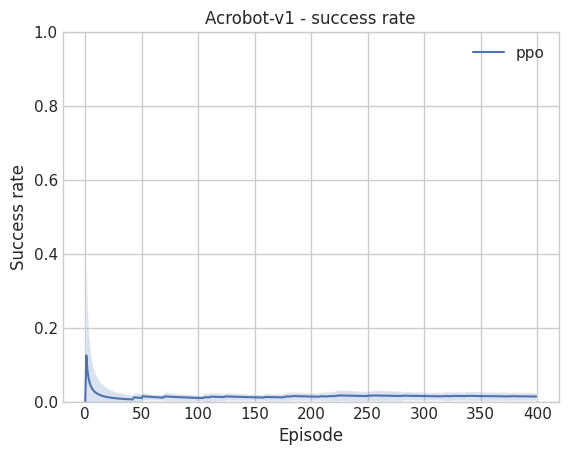

In [ ]:
plot(algos, "Acrobot-v1", seeds, "success rate")

In [8]:
def create_plot_grid(methods, envs, seeds, ax):
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))

    # add margin bewteen subplots
    fig.subplots_adjust(hspace = 0.4)

    # add title to the whole plot
    # fig.suptitle("Comparing abstraction methods on " + ax)

    for i, env in enumerate(envs):
        plot(methods, env, seeds, ax, axs[i // 3][i % 3])
        
    #save the plot as svg
    plt.savefig(f"images/{ax}.pdf", bbox_inches='tight', format='pdf')
    plt.show()



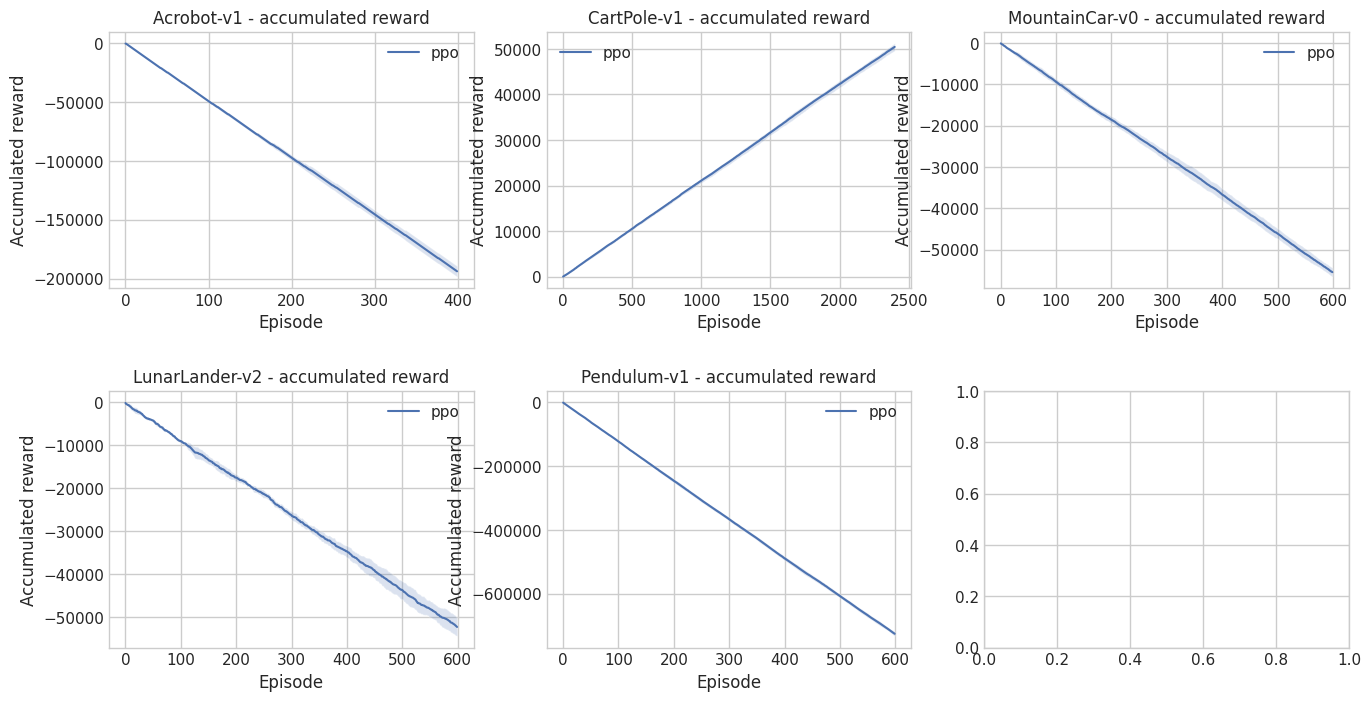

In [ ]:
create_plot_grid(algos, envs, seeds, "accumulated reward")


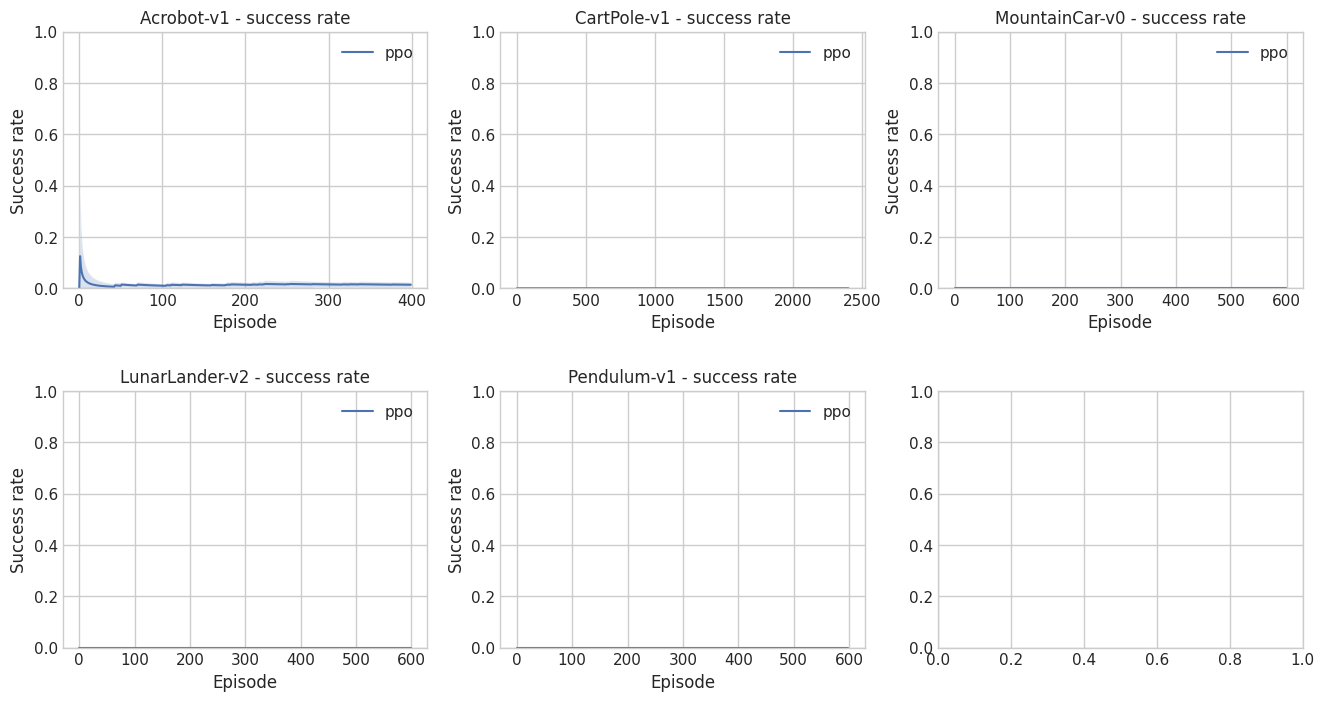

In [ ]:
create_plot_grid(algos, envs, seeds, "success rate")

In [9]:
import glob


def load_datas_icml(env: str):
    
    path = f"results/icml/{env}/*"
    for name in glob.glob(path):
        # if the file does not contain info in name
        if "info" not in name:
            print(name)
            data = pd.read_csv(name)
            # add column for accumulated reward
            data['accumulated reward'] = data['rewards'].cumsum()

            # add column for success rate
            data['success rate'] = data['success'].mean()

In [33]:
def load_data(env, bin, episodes):
    path = f"results/icml/{env}/icml_{episodes}_{bin}_*"
    for name in glob.glob(path):
        # if the file does not contain info in name
        if "info" not in name:
            print(name)
            data = pd.read_csv(name)
            # add column for accumulated reward
            data['accumulated reward'] = data['rewards'].cumsum()

            # add column for success rate
            data['success rate'] = data['success'].mean()
            print(data)
            return data

# load data for k bins
algos = ["ppo"]
envs = ["MountainCarContinuous-v0", "Pendulum-v1"]

episodes = [600, 3600]
bins = [2, 4, 8, 10, 25, 50]
dataKBins = {}
for algo in algos:
    dataKBins[algo] = {}
    for env, ep in zip(envs, episodes):
        dataKBins[algo][env] = {}
        for bin in bins:

            dataKBins[algo][env][bin] = load_data(env, bin, ep)

results/icml/MountainCarContinuous-v0/icml_600_2_ppo_400_882.csv
     Unnamed: 0  success      times     rewards  steps  accumulated reward  \
0             0        0   0.151223  1396.97347    999          1396.97347   
1             1        0   0.300402  1303.59983    999          2700.57330   
2             2        0   0.452640  1626.69667    999          4327.26997   
3             3        0   0.602907  1438.61853    999          5765.88850   
4             4        0   0.752983  1174.06534    999          6939.95384   
..          ...      ...        ...         ...    ...                 ...   
395         395        0  60.464016   955.89880    999        548881.57792   
396         396        0  60.598667  1829.70108    843        550711.27900   
397         397        0  60.715154  1284.95739    730        551996.23639   
398         398        0  60.870970  1037.40125    999        553033.63764   
399         399        0  61.025645  1648.03325    999        554681.67089   

In [34]:
# plot each bin for each method in each env
def plot_k_bins(algo, env, bins, ax):

    for bin in bins:
        plot_data = dataKBins[algo][env][bin]

        plt.plot(plot_data.index, plot_data["accumulated reward"], label=f"{bin} bins")

        # add legend
        plt.legend()
        plt.xlabel("Episode")
        plt.ylabel(ax[0].upper() + ax[1:])
        plt.title(f"{env}-{algo}")
        # if success rate, set y limit to [0,1]
        if ax == "success rate":
            plt.ylim(0, 1)

    plt.show()

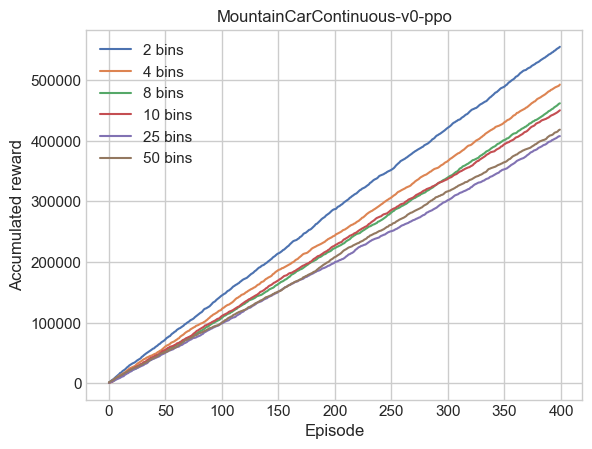

In [35]:
plot_k_bins("ppo", envs[0], bins, "accumulated reward")

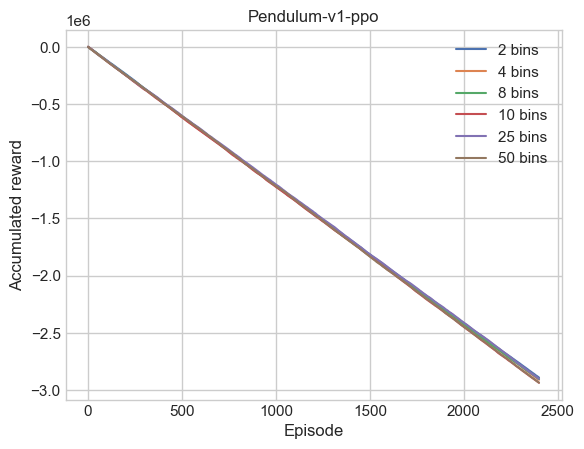

In [36]:
plot_k_bins("ppo", envs[1], bins, "accumulated reward")
